In [ ]:
!mkdir data

In [ ]:
!# Import the required libraries.
import os
import zipfile

# Specify the path to the zip file.
zip_path = "/content/dataset-20240224T070516Z-001.zip"

# Create a new directory to store the extracted files.
extract_dir = "/content/data"
os.makedirs(extract_dir, exist_ok=True)

# Open the zip file.
with zipfile.ZipFile(zip_path, "r") as zip_ref:
  # Extract all the files in the zip file to the specified directory.
  zip_ref.extractall(extract_dir)

# Print a success message.
print("Extracted all files to", extract_dir)

In [ ]:
#misnalious

In [ ]:
!pip install mtcnn
!!pip install keras-facenet

In [ ]:
#importing necessary libraries

import cv2 as cv
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from mtcnn.mtcnn import MTCNN
from keras_facenet import FaceNet


In [ ]:
img = cv.imread("/content/data/dataset/image_1.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img) # RGB

In [ ]:
class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160,160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()


    def extract_face(self, filename):
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        x,y,w,h = self.detector.detect_faces(img)[0]['box']
        x,y = abs(x), abs(y)
        face = img[y:y+h, x:x+w]
        face_arr = cv.resize(face, self.target_size)
        return face_arr


    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = dir + im_name
                single_face = self.extract_face(path)
                FACES.append(single_face)
            except Exception as e:
                pass
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = self.directory +'/'+ sub_dir+'/'
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)

        return np.asarray(self.X), np.asarray(self.Y)


    def plot_images(self):
        plt.figure(figsize=(18,16))
        for num,image in enumerate(self.X):
            ncols = 3
            nrows = len(self.Y)//ncols + 1
            plt.subplot(nrows,ncols,num+1)
            plt.imshow(image)
            plt.axis('off')

In [ ]:
faceloading = FACELOADING("/content/data/dataset")
X, Y = faceloading.load_classes()

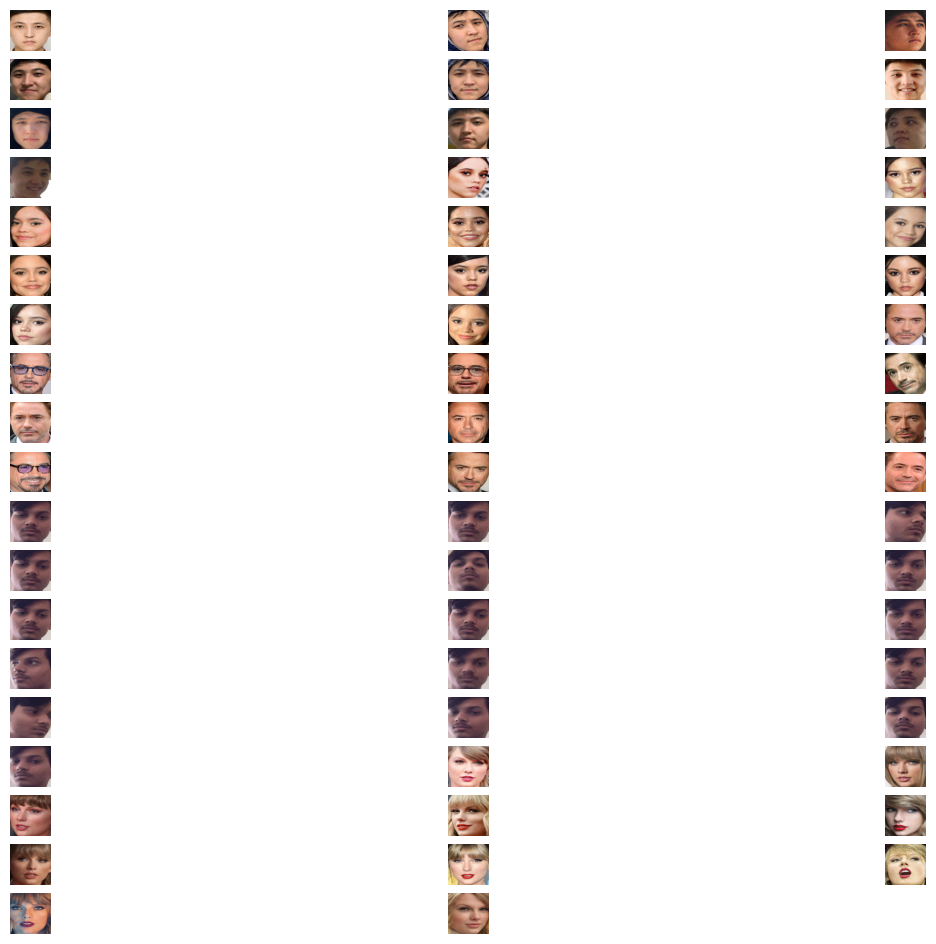

In [ ]:
plt.figure(figsize=(16,12))
for num,image in enumerate(X):
    ncols = 3
    nrows = len(Y)//ncols + 1
    plt.subplot(nrows,ncols,num+1)
    plt.imshow(image)
    plt.axis('off')

In [ ]:
embedder = FaceNet()

def get_embedding(face_img):
    face_img = face_img.astype('float32') # 3D(160x160x3)
    face_img = np.expand_dims(face_img, axis=0)
    # 4D (Nonex160x160x3)
    yhat= embedder.embeddings(face_img)
    return yhat[0] # 512D image (1x1x512)

In [ ]:
EMBEDDED_X = []

for img in X:
    EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 [==============================] - 0s 91ms/step


In [ ]:
np.savez_compressed('faces_embeddings_done_4classes.npz', EMBEDDED_X, Y)

In [ ]:
#classification using SVM

In [ ]:
#from sklearn.preprocessing import LabelEncoder

#encoder = LabelEncoder()
#encoder.fit(Y)
#Y = encoder.transform(Y)

Text(0, 0.5, 'sardor_abdirayimov')

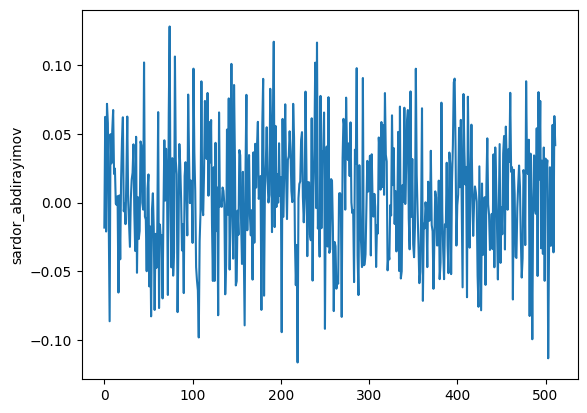

In [ ]:
plt.plot(EMBEDDED_X[0])
plt.ylabel(Y[0])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, shuffle=True, random_state=17)

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [ ]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_train, ypreds_train)

1.0

In [ ]:
accuracy_score(Y_test,ypreds_test)

1.0

In [ ]:
from google.colab.patches import cv2_imshow
t_im = cv.imread("/content/data/dataset/image_1.jpg")
t_im = cv.cvtColor(t_im, cv.COLOR_BGR2RGB)
cv2_imshow(t_im)
detector = MTCNN()
x,y,w,h = detector.detect_faces(t_im)[0]['box']

In [ ]:
t_im = t_im[y:y+h, x:x+w]
t_im = cv.resize(t_im, (160,160))
test_im = get_embedding(t_im)

1/1 [==============================] - 0s 94ms/step


In [ ]:
test_im = [test_im]
ypreds = model.predict(test_im)

In [ ]:
ypreds

array(['Abhigyan'], dtype='<U18')

In [ ]:
#encoder.inverse_transform(ypreds)

In [ ]:
import pickle
#save the model
with open('svm_model_160x160.pkl','wb') as f:
    pickle.dump(model,f)

In [ ]:
#performing one to many
from sklearn.cluster import KMeans
import numpy as np
facial_embeddings = EMBEDDED_X
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(facial_embeddings)
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_
print(cluster_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]


In [ ]:
a = facial_embeddings[0]
a = a.reshape(1, -1)

In [ ]:
print(kmeans.predict(a))

[3]


In [ ]:
import numpy as np
import cv2
from mtcnn import MTCNN
from keras_facenet import FaceNet
from sklearn.svm import SVC
import joblib
from google.colab.patches import cv2_imshow

def get_embedding(face_img, embedder):
    face_img = face_img.astype('float32')
    face_img = np.expand_dims(face_img, axis=0)
    yhat = embedder.embeddings(face_img)
    return yhat[0]

def recognize_faces(frame, detector, svc_model, embedder, labels):
    faces = detector.detect_faces(frame)
    for face in faces:
        bounding_box = face['box']
        keypoints = face['keypoints']

        x, y, w, h = bounding_box
        face_img = frame[y:y+h, x:x+w]
        embedding = get_embedding(face_img, embedder)

        label = str(svc_model.predict([embedding])[0])  # Directly use the label from the list of labels
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

    return frame

# Load your SVC model for classification
svc_model_path = '/content/svm_model_160x160.pkl'
svc_model = joblib.load(svc_model_path)

# Load your face embedding model (e.g., FaceNet)
face_embedding_model = FaceNet()
labels = [...]


# Initialize the MTCNN detector
detector = MTCNN()

# Open video capture
cap = cv2.VideoCapture('/content/VID_20240224_145158.mp4')

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    # Perform facial recognition on the frame
    processed_frame = recognize_faces(frame, detector, svc_model, face_embedding_model, labels)

    # Write the modified frame to the output video file
    out.write(processed_frame)

    cv2_imshow(processed_frame)  # Display the frame in Google Colab
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release everything when done
cap.release()
out.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 355ms/step


1/1 [==============================] - 0s 216ms/step
